In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### FIRST
get the final csv file we got as a result of the "clenaing" work

In [182]:
final_sharks = pd.read_csv("../data/final_sharks.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
final_sharks.head()

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,year_c,month_c,day_c,Act_class,date_c,day_of_week
0,0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,2018.0,6.0,25.0,other,2018-06-25,Monday
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,2018.0,6.0,18.0,other,2018-06-18,Monday
2,2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,2018.0,6.0,9.0,surfing,2018-06-09,Saturday
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,2018.0,6.0,8.0,surfing,2018-06-08,Friday
4,4,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,2018.0,6.0,4.0,diving,2018-06-04,Monday


In [6]:
final_sharks.columns

Index(['Unnamed: 0', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'original order', 'year_c', 'month_c', 'day_c', 'Act_class', 'date_c',
       'day_of_week'],
      dtype='object')

### <u>Question 1: activity done during the attack and its relation with fatal result</u>
To answer this question we must first clean the values of the Fatal column to remove those that are not what they are 
supposed to be: Y or N

In [7]:
#check the values to see if there are anything appart from the desired ones (Y/N).
final_sharks['Fatal (Y/N)'].value_counts()

Fatal (Y/N)
N          4018
Y          1282
UNKNOWN      36
 N            5
M             1
2017          1
y             1
Name: count, dtype: int64

In [8]:
#getting just the desired values of 'Fatal'column
final_sharks_fatal=final_sharks[(final_sharks['Fatal (Y/N)'] == 'N') | (final_sharks['Fatal (Y/N)'] == 'Y')]

In [9]:
final_sharks_fatal.head()

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,year_c,month_c,day_c,Act_class,date_c,day_of_week
0,0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,2018.0,6.0,25.0,other,2018-06-25,Monday
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,2018.0,6.0,18.0,other,2018-06-18,Monday
2,2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,2018.0,6.0,9.0,surfing,2018-06-09,Saturday
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,2018.0,6.0,8.0,surfing,2018-06-08,Friday
4,4,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,2018.0,6.0,4.0,diving,2018-06-04,Monday


In [10]:
type(final_sharks_fatal)

pandas.core.frame.DataFrame

In [11]:
#verification that de data frame has the values we wanted and not those undesired
final_sharks_fatal['Fatal (Y/N)'].value_counts

<bound method IndexOpsMixin.value_counts of 0       N
1       N
2       N
3       N
4       N
       ..
5753    Y
5754    Y
5755    Y
5756    Y
5757    Y
Name: Fatal (Y/N), Length: 5300, dtype: object>

In [12]:
Act_class_Fatal=final_sharks_fatal[['Act_class','Fatal (Y/N)']]

In [13]:
# checking the quantity of each type of attack to verify if its a significative quantity to get further conclusions
Attack=[Act_class_Fatal['Act_class'].value_counts()]
table_attacks = pd.DataFrame(Attack)
table_attacks

Act_class,other,surfing,swimming,fishing,diving,shark interacting,sailing
count,1910,1048,1004,688,469,118,63


In [16]:
Act_class_Fatal[['Act_class']['Fatal (Y/N)' == 'N']].value_counts()

Act_class
other                1910
surfing              1048
swimming             1004
fishing               688
diving                469
shark interacting     118
sailing                63
Name: count, dtype: int64

In [17]:
# Group by 'Act_class' and calculate the percentage of 'dead' and 'not dead'
A_F_percentaje = Act_class_Fatal.groupby('Act_class')['Fatal (Y/N)'].value_counts(normalize=True).unstack(fill_value=0)
# Calculate the percentage of mortality (dead / (dead + not dead)) for each type of activity
A_F_percent = A_F_percentaje['Mortality Percentage'] = (A_F_percentaje['Y'] / (A_F_percentaje['Y'] + A_F_percentaje['N'])) * 100


Text(0.5, 1.0, 'Mortality Percentage by Type of Activity')

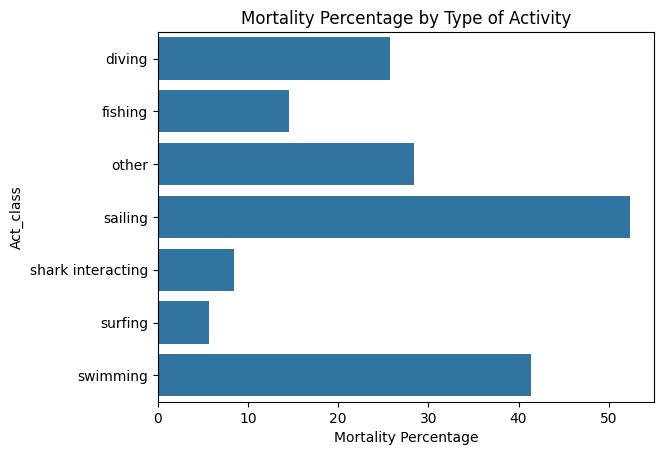

In [32]:
plot_A_F_percent = sns.barplot(data=A_F_percentaje, y=A_F_percentaje.index, x='Mortality Percentage')
plt.title('Mortality Percentage by Type of Activity')

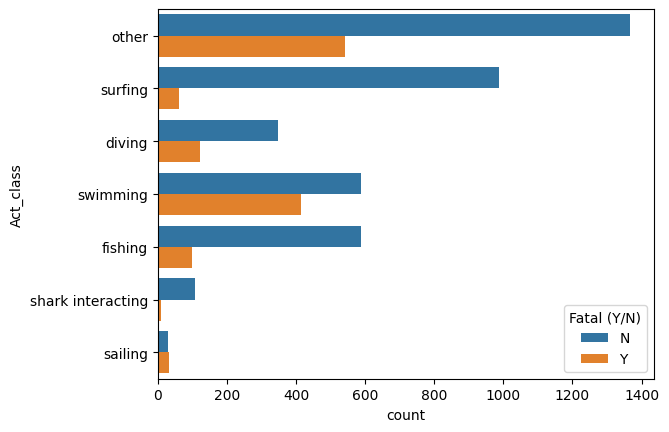

In [33]:
plot_A_F=sns.countplot(y='Act_class', hue ='Fatal (Y/N)', data =Act_class_Fatal)

### <u>Question 2: is there a correlation between death and age or sex?</u>
To answer this question we get the two activities with the highest mortality in percentaje and significative data:

 1- swimming
 
 2- diving

In [37]:
final_sharks_fatal.columns

Index(['Unnamed: 0', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'original order', 'year_c', 'month_c', 'day_c', 'Act_class', 'date_c',
       'day_of_week'],
      dtype='object')

In [52]:
final_sharks_fatal.sample()

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,year_c,month_c,day_c,Act_class,date_c,day_of_week
4163,4482,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"South Beach, Durban",Body surfing,Clive Dumayne,M,14,"FATAL, body not recovered",Y,14h30,"White shark, 3.7 m [12'] according to witnesses","M. Dumayne, M. Levine, GSAF",1950.02.11-Dumayne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1821.0,1950.0,2.0,11.0,surfing,1950-02-11,Saturday


In [58]:
#create a dataframe with just the columns I will ananlize
A_age_sex=final_sharks_fatal[['Sex ','Age','Fatal (Y/N)','Act_class']]
A_age_sex.sample()

,Sex,Age,Fatal (Y/N),Act_class
2199,F,24,N,surfing


In [124]:
A_age_sex.isna()

,Sex,Age,Fatal (Y/N),Act_class
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
5753,False,True,False,False
5754,False,True,False,False
5755,False,True,False,False
5756,False,True,False,False


In [131]:
#removin NaN from the new dataframe created for this question
A_age_sex = A_age_sex.dropna(subset=['Age'])
A_age_sex = A_age_sex.dropna(subset=['Sex '])
A_age_sex.isna().sum()

Sex            0
Age            0
Fatal (Y/N)    0
Act_class      0
dtype: int64

In [132]:
A_age_sex.shape

(3012, 4)

In [142]:
sw_div_sex_age = A_age_sex[(A_age_sex['Act_class'] == 'swimming') | (A_age_sex['Act_class'] == 'diving')]
sw_div_sex_age.sample()

,Sex,Age,Fatal (Y/N),Act_class
5640,M,19.0,N,swimming


In [152]:
sw_div_sex_age.dtypes

Sex             object
Age            float64
Fatal (Y/N)     object
Act_class       object
dtype: object

In [170]:
#I realized there was an odd 'M'value, probably due to an empty space => remove all empty spaces from the dataframe
sw_div_sex_age['Sex '] = sw_div_sex_age['Sex '].str.strip()

#moving Age values to numeric because they are int and we want to aggregate
sw_div_sex_age.dtypes['Age'] =pd.to_numeric(sw_div_sex_age['Age'], errors='coerce')

result = A_age_sex_mortality_activity.groupby(['Act_class', 'Sex ']).agg({'Age': [('Age_Mean', lambda x: round(x.mean(), 1)), ('Count', 'count')]})

In [174]:
table_1 = sw_div_sex_age.groupby(['Act_class', 'Sex ', 'Fatal (Y/N)'])['Age'].agg(mean=lambda x: round(x.mean(), 1),count='count')

In [175]:
table_1

mean  count
Act_class Sex  Fatal (Y/N)             
diving    F    N            35.1      7
               Y            35.7     10
          M    N            32.9    165
               Y            29.4     56
swimming  F    N            27.3     91
               Y            28.4     30
          M    N            25.7    320
               Y            25.4    192

***diving has not enough data in F group. Let's got a bit dipper into swimming group which has more data***

In [178]:
swimming = sw_div_sex_age[(sw_div_sex_age['Act_class'] == 'swimming')]

Text(0.5, 1.0, 'swimming Mortality/ Age / Sex ')

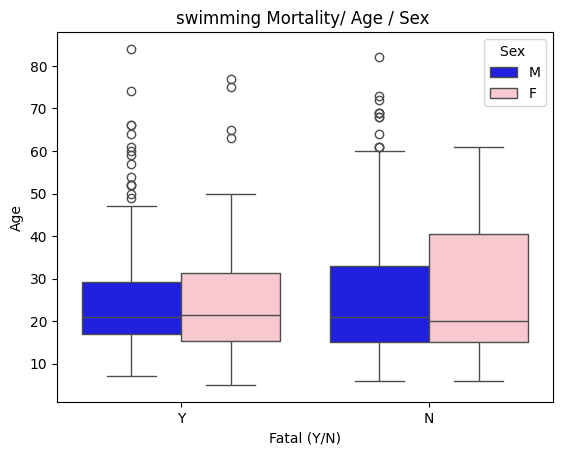

In [181]:
sns.set_palette(['blue', 'pink'])
plot_swimming =sns.boxplot(y="Age", x='Fatal (Y/N)', hue='Sex ', data=swimming)
#code to modify Y axis so no all ages are plot, just 10's
y_ticks = range(10, int(swimming['Age'].max()) + 10, 10)
plt.title('swimming Mortality/ Age / Sex ')


In [ ]:
A_age_sex_mortality_activity['Age'] = pd.to_numeric(A_age_sex_mortality_activity['Age'], errors='coerce')